In [1]:
import glob
import pandas as pd
import json
import requests

In [2]:
df1 = pd.read_csv("C:/Users\Rajasekar/Downloads/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")
df2 = pd.read_csv("C:/Users\Rajasekar/Downloads/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv")
df3 = pd.read_csv("C:/Users\Rajasekar/Downloads/ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")
df4 = pd.read_csv("C:/Users\Rajasekar/Downloads/ResaleFlatPricesBasedonApprovalDate19901999 (1).csv")
df5 = pd.read_csv("C:/Users\Rajasekar/Downloads/ResaleFlatPricesBasedonApprovalDate2000Feb2012 (2).csv")
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,NaN,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,NaN,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,NaN,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,NaN,705000.0


In [3]:
df.shape

(913861, 11)

In [4]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease        709050
resale_price                0
dtype: int64

In [5]:
# droping remaining_lease missing values
df = df.dropna()
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [7]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [16]:
list_of_town = ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN']

In [17]:
import requests

mrt_lat = []
mrt_long = []

for i in range(0, len(list_of_town)):
    query_address = list_of_town[i]
    base_url = 'https://nominatim.openstreetmap.org/search'
    
    params = {
        'format': 'json',
        'q': query_address + ', Singapore',
    }

    resp = requests.get(base_url, params=params)
    data = resp.json()

    if resp.status_code == 200 and data:
        # Assuming the first result is the most relevant
        lat = float(data[0]['lat'])
        lon = float(data[0]['lon'])
        mrt_lat.append(lat)
        mrt_long.append(lon)

        print(f"{query_address}, Lat: {lat}, Long: {lon}")
    else:
        mrt_lat.append('NotFound')
        mrt_long.append('NotFound')
        print(f"No Results for {query_address}")

ANG MO KIO, Lat: 1.3700803, Long: 103.8495228
BEDOK, Lat: 1.3239765, Long: 103.930216
BISHAN, Lat: 1.3509859, Long: 103.84825507492937
BUKIT BATOK, Lat: 1.3490572, Long: 103.7495906
BUKIT MERAH, Lat: 1.2837356, Long: 103.8200999
BUKIT PANJANG, Lat: 1.3791486, Long: 103.76141301431002
BUKIT TIMAH, Lat: 1.3546901, Long: 103.7763724
No Results for CENTRAL AREA
CHOA CHU KANG, Lat: 1.3847493, Long: 103.7445341
CLEMENTI, Lat: 1.3151003, Long: 103.7652311
GEYLANG, Lat: 1.3181862, Long: 103.8870563
HOUGANG, Lat: 1.3708011, Long: 103.89254433997465
JURONG EAST, Lat: 1.333108, Long: 103.7422939
JURONG WEST, Lat: 1.3434392, Long: 103.7058663
KALLANG/WHAMPOA, Lat: 1.3316457, Long: 103.8389048
MARINE PARADE, Lat: 1.3026889, Long: 103.9073952
PASIR RIS, Lat: 1.3730307, Long: 103.949255
PUNGGOL, Lat: 1.4051559, Long: 103.90236801879885
QUEENSTOWN, Lat: 1.2946226, Long: 103.8060366
SEMBAWANG, Lat: 1.4490928, Long: 103.8200555
SENGKANG, Lat: 1.3919236499999998, Long: 103.89549093760694
SERANGOON, Lat: 

In [18]:
town_location = pd.DataFrame({
    'Town': list_of_town,
    'latitude': mrt_lat,
    'longitude': mrt_long
})

In [14]:
df['address'] = df['block'] + " " + df['street_name']
df

C:\Users\Rajasekar\AppData\Local\Temp\ipykernel_3300\2900962711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['address'] = df['block'] + " " + df['street_name']


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...
167653,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,63 years 06 months,855000.0,824 YISHUN ST 81
167654,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years 07 months,860000.0,837 YISHUN ST 81
167655,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,63 years 02 months,780000.0,826 YISHUN ST 81
167656,2023-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,63 years 11 months,1080000.0,666 YISHUN AVE 4


In [15]:
address_list = df['address'].unique()

In [17]:
df['address'] = df['block'] + " " + df['street_name']
df

C:\Users\Rajasekar\AppData\Local\Temp\ipykernel_32024\2900962711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['address'] = df['block'] + " " + df['street_name']


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...
167653,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,63 years 06 months,855000.0,824 YISHUN ST 81
167654,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years 07 months,860000.0,837 YISHUN ST 81
167655,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,63 years 02 months,780000.0,826 YISHUN ST 81
167656,2023-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,63 years 11 months,1080000.0,666 YISHUN AVE 4


In [40]:
town_location

,town,Distance (km)
0,ANG MO KIO,103.023949
1,BEDOK,109.552562
2,BISHAN,102.073470
3,BUKIT BATOK,91.922295
4,BUKIT MERAH,96.516619
5,BUKIT PANJANG,94.545342
6,BUKIT TIMAH,94.891369
7,CENTRAL AREA,NaN
8,CHOA CHU KANG,93.146421
9,CLEMENTI,92.019115


In [21]:
from geopy.distance import geodesic

town_data = [
    {"Town": "ANG MO KIO", "latitude": 1.37008, "longitude": 103.849523},
    {"Town": "BEDOK", "latitude": 1.323976, "longitude": 103.930216},
    {"Town": "BISHAN", "latitude": 1.350986, "longitude": 103.848255},
    {"Town": "BUKIT BATOK", "latitude": 1.349057, "longitude": 103.749591},
    {"Town": "BUKIT MERAH", "latitude": 1.283736, "longitude": 103.8201},
    {"Town": "BUKIT PANJANG", "latitude": 1.379149, "longitude": 103.761413},
    {"Town": "BUKIT TIMAH", "latitude": 1.35469, "longitude": 103.776372},
    {"Town": "CENTRAL AREA", "latitude": None, "longitude": None},
    {"Town": "CHOA CHU KANG", "latitude": 1.384749, "longitude": 103.744534},
    {"Town": "CLEMENTI", "latitude": 1.3151, "longitude": 103.765231},
    {"Town": "GEYLANG", "latitude": 1.318186, "longitude": 103.887056},
    {"Town": "HOUGANG", "latitude": 1.370801, "longitude": 103.892544},
    {"Town": "JURONG EAST", "latitude": 1.333108, "longitude": 103.742294},
    {"Town": "JURONG WEST", "latitude": 1.343439, "longitude": 103.705866},
    {"Town": "KALLANG/WHAMPOA", "latitude": 1.331646, "longitude": 103.838905},
    {"Town": "MARINE PARADE", "latitude": 1.302689, "longitude": 103.907395},
    {"Town": "PASIR RIS", "latitude": 1.373031, "longitude": 103.949255},
    {"Town": "PUNGGOL", "latitude": 1.405156, "longitude": 103.902368},
    {"Town": "QUEENSTOWN", "latitude": 1.294623, "longitude": 103.806037},
    {"Town": "SEMBAWANG", "latitude": 1.449093, "longitude": 103.820055},
    {"Town": "SENGKANG", "latitude": 1.391924, "longitude": 103.895491},
    {"Town": "SERANGOON", "latitude": 1.349761, "longitude": 103.873684},
    {"Town": "TAMPINES", "latitude": 1.354653, "longitude": 103.943571},
    {"Town": "TOA PAYOH", "latitude": 1.335391, "longitude": 103.849741},
    {"Town": "WOODLANDS", "latitude": 1.436897, "longitude": 103.786216},
    {"Town": "YISHUN", "latitude": 1.429384, "longitude": 103.835028},
]

# Central Area coordinates
central_area_coordinates = (1.0, 103.0)  # Replace with actual coordinates

# Calculate distances
distances = []

for town in town_data:
    if town["latitude"] is not None and town["longitude"] is not None:
        town_coordinates = (town["latitude"], town["longitude"])
        distance = geodesic(central_area_coordinates, town_coordinates).kilometers
        distances.append({"Town": town["Town"], "Distance (km)": distance})
    else:
        distances.append({"Town": town["Town"], "Distance (km)": None})

town_location = pd.DataFrame(distances)
        # Print or use the distances as needed
for distance_info in distances:
    print(f"{distance_info['Town']}: {distance_info['Distance (km)']} km")

ANG MO KIO: 103.02394926171135 km
BEDOK: 109.55256230348915 km
BISHAN: 102.07346959616324 km
BUKIT BATOK: 91.9222947930287 km
BUKIT MERAH: 96.51661895286801 km
BUKIT PANJANG: 94.54534205665682 km
BUKIT TIMAH: 94.8913691118256 km
CENTRAL AREA: None km
CHOA CHU KANG: 93.14642102105572 km
CLEMENTI: 92.01911491243088 km
GEYLANG: 104.8082722166412 km
HOUGANG: 107.4653025659953 km
JURONG EAST: 90.45372655358287 km
JURONG WEST: 87.25742480148632 km
KALLANG/WHAMPOA: 100.31069355070376 km
MARINE PARADE: 106.39210634443583 km
PASIR RIS: 113.41454457408257 km
PUNGGOL: 109.96826312182179 km
QUEENSTOWN: 95.44181536657187 km
SEMBAWANG: 103.90210864732647 km
SENGKANG: 108.6782766639042 km
SERANGOON: 104.64647829406626 km
TAMPINES: 112.09886371257855 km
TOA PAYOH: 101.5845636896283 km
WOODLANDS: 99.95155227272735 km
YISHUN: 104.35982935431403 km


In [22]:
town_location

,Town,Distance (km)
0,ANG MO KIO,103.023949
1,BEDOK,109.552562
2,BISHAN,102.073470
3,BUKIT BATOK,91.922295
4,BUKIT MERAH,96.516619
5,BUKIT PANJANG,94.545342
6,BUKIT TIMAH,94.891369
7,CENTRAL AREA,NaN
8,CHOA CHU KANG,93.146421
9,CLEMENTI,92.019115


In [26]:
town_location.rename(columns={"Town": "town"}, inplace=True)

In [39]:
town_location

,town,Distance (km)
0,ANG MO KIO,103.023949
1,BEDOK,109.552562
2,BISHAN,102.073470
3,BUKIT BATOK,91.922295
4,BUKIT MERAH,96.516619
5,BUKIT PANJANG,94.545342
6,BUKIT TIMAH,94.891369
7,CENTRAL AREA,NaN
8,CHOA CHU KANG,93.146421
9,CLEMENTI,92.019115


In [38]:
# Merge DataFrames with an outer join
merged_df = pd.merge(town_location,df, on="town", how="right")

# Print or use the merged DataFrame as needed
print(merged_df)

              town  Distance (km)    month         flat_type block  \
0       ANG MO KIO     103.023949  2015-01            3 ROOM   174   
1       ANG MO KIO     103.023949  2015-01            3 ROOM   541   
2       ANG MO KIO     103.023949  2015-01            3 ROOM   163   
3       ANG MO KIO     103.023949  2015-01            3 ROOM   446   
4       ANG MO KIO     103.023949  2015-01            3 ROOM   557   
...            ...            ...      ...               ...   ...   
204806      YISHUN     104.359829  2023-05         EXECUTIVE   824   
204807      YISHUN     104.359829  2023-07         EXECUTIVE   837   
204808      YISHUN     104.359829  2023-12         EXECUTIVE   826   
204809      YISHUN     104.359829  2023-01  MULTI-GENERATION   666   
204810      YISHUN     104.359829  2023-06  MULTI-GENERATION   633   

              street_name storey_range  floor_area_sqm        flat_model  \
0        ANG MO KIO AVE 4     07 TO 09            60.0          Improved   
1      

In [33]:
merged_df

,town,Distance (km),month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,ANG MO KIO,103.023949,2015-01,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,ANG MO KIO,103.023949,2015-01,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,ANG MO KIO,103.023949,2015-01,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,ANG MO KIO,103.023949,2015-01,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,ANG MO KIO,103.023949,2015-01,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204806,YISHUN,104.359829,2023-05,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,63 years 06 months,855000.0,824 YISHUN ST 81
204807,YISHUN,104.359829,2023-07,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years 07 months,860000.0,837 YISHUN ST 81
204808,YISHUN,104.359829,2023-12,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,63 years 02 months,780000.0,826 YISHUN ST 81
204809,YISHUN,104.359829,2023-01,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,63 years 11 months,1080000.0,666 YISHUN AVE 4


In [41]:
merged_df.to_csv('combined.csv', index = False)

In [43]:
merged_df.isnull().sum()

town                      0
Distance (km)          1785
month                     0
flat_type                 0
block                     0
street_name               0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
remaining_lease           0
resale_price              0
address                   0
dtype: int64

In [46]:
merged_df["Distance (km)"].fillna(0, inplace=True)

In [47]:
merged_df.isnull().sum()

town                   0
Distance (km)          0
month                  0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
address                0
dtype: int64

In [48]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

merged_df['storey_median'] = merged_df['storey_range'].apply(lambda x: get_median(x))
merged_df

,town,Distance (km),month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,storey_median
0,ANG MO KIO,103.023949,2015-01,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,8.0
1,ANG MO KIO,103.023949,2015-01,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2.0
2,ANG MO KIO,103.023949,2015-01,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4,2.0
3,ANG MO KIO,103.023949,2015-01,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10,2.0
4,ANG MO KIO,103.023949,2015-01,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204806,YISHUN,104.359829,2023-05,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,63 years 06 months,855000.0,824 YISHUN ST 81,8.0
204807,YISHUN,104.359829,2023-07,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,63 years 07 months,860000.0,837 YISHUN ST 81,2.0
204808,YISHUN,104.359829,2023-12,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,63 years 02 months,780000.0,826 YISHUN ST 81,2.0
204809,YISHUN,104.359829,2023-01,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,63 years 11 months,1080000.0,666 YISHUN AVE 4,8.0


In [54]:
scope_df = merged_df[['Distance (km)','floor_area_sqm','lease_commence_date','storey_median','resale_price']]
scope_df

,Distance (km),floor_area_sqm,lease_commence_date,storey_median,resale_price
0,103.023949,60.0,1986,8.0,255000.0
1,103.023949,68.0,1981,2.0,275000.0
2,103.023949,69.0,1980,2.0,285000.0
3,103.023949,68.0,1979,2.0,290000.0
4,103.023949,68.0,1980,8.0,290000.0
...,...,...,...,...,...
204806,104.359829,146.0,1987,8.0,855000.0
204807,104.359829,146.0,1988,2.0,860000.0
204808,104.359829,142.0,1988,2.0,780000.0
204809,104.359829,179.0,1987,8.0,1080000.0


In [55]:
scope_df.dtypes

Distance (km)          float64
floor_area_sqm         float64
lease_commence_date      int64
storey_median          float64
resale_price           float64
dtype: object

<Axes: title={'center': 'Correlation Heatmap'}>

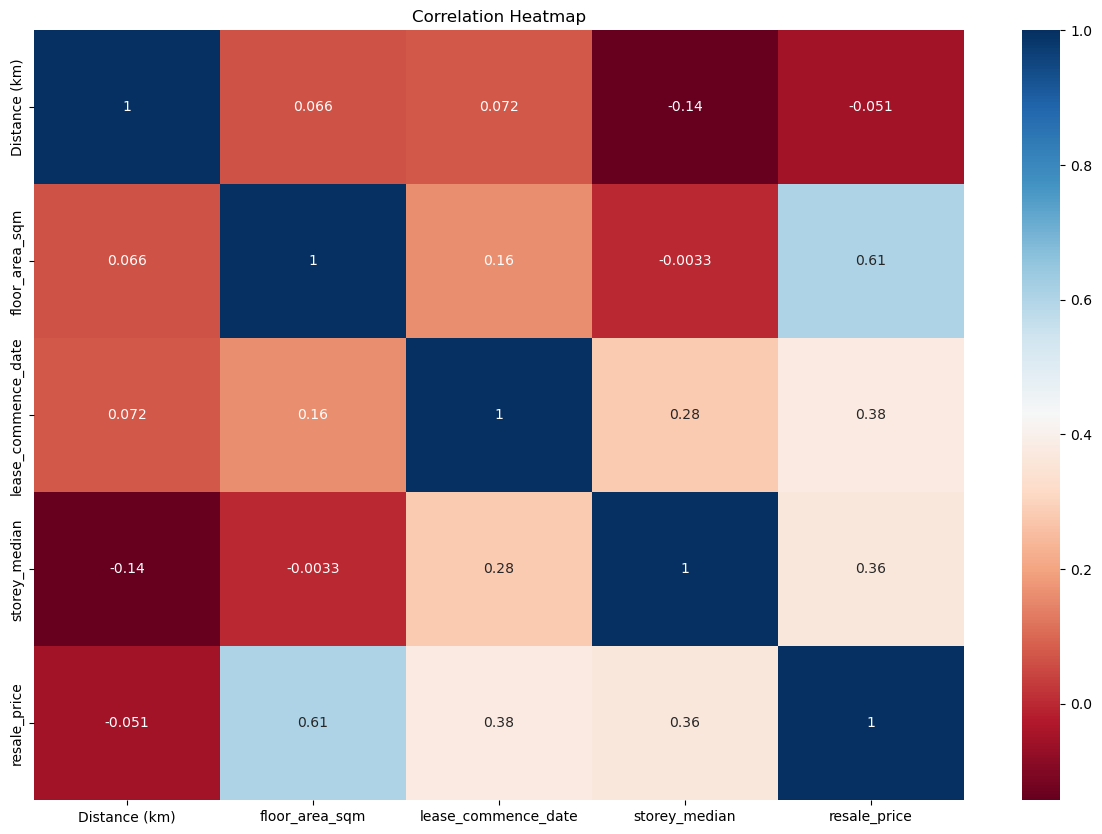

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = scope_df.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [60]:
from sklearn.preprocessing import StandardScaler

X=scope_df[['Distance (km)','floor_area_sqm','lease_commence_date','storey_median']]
y=scope_df['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3
0,0.152351,-1.548728,-0.659941,-0.112570
1,0.152351,-1.216167,-1.028718,-1.138535
2,0.152351,-1.174596,-1.102474,-1.138535
3,0.152351,-1.216167,-1.176229,-1.138535
4,0.152351,-1.216167,-1.102474,-0.112570
...,...,...,...,...
204806,0.262690,2.026307,-0.586185,-0.112570
204807,0.262690,2.026307,-0.512430,-1.138535
204808,0.262690,1.860027,-0.512430,-1.138535
204809,0.262690,3.398123,-0.586185,-0.112570


In [62]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [64]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1320 fits failed out of a total of 3960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Rajasekar\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Rajasekar\an

Best hyperparameters: {'max_depth': 22, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
 
Mean squared error: 3655884941.1360807
Mean Absolute Error 45644.69142275465
Root Mean squared error: 60463.9143715992
 
R-squared: 0.866684720059173


In [65]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [66]:
from IPython.display import FileLink

FileLink('model.pkl', result_html_prefix="Click to download: ")

C:\Users\Rajasekar\model.pkl

In [67]:
FileLink('scaler.pkl', result_html_prefix="Click to download: ")

C:\Users\Rajasekar\scaler.pkl